<a href="https://colab.research.google.com/github/Addi-debug/python-projects/blob/main/ESG_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For numerical computations
import numpy as np

# For data manipulation
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For custom plot settings
from matplotlib import rcParams
from matplotlib.cm import rainbow

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# For splitting data into train/test sets
from sklearn.model_selection import train_test_split

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data.csv')
df.head()

,Unique_id,Symbol,Company_name,Exchange,gicSector,gicSubindustry,Company_ESG_pulse,ESG_beta,SNP,Sustainalytics,...,52w_change price,52w_change price percent,52w_average volume,Name,Sector,Industry,isin,cusip,Securities_type,Currency_code
0,190179,MMM,3M Company,New York Stock Exchange,Industrials,Industrial Conglomerates,-0.083992,0.010832,67.0,32.2,...,-11.290,-10.83,1648276.0,3M Company Common Stock,Health Care,Medical/Dental Instruments,US88579Y1010,88579Y101,Common Stock,USD
1,205868,JOBS,"51job, Inc",Nasdaq,Industrials,Human Resource & Employment Services,0.776978,-0.203820,89.0,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,US3168271043,316827104,Common Stock,USD
2,191323,AOS,A. O. Smith Corporation,New York Stock Exchange,Industrials,Building Products,0.251170,0.159637,17.0,25.5,...,19.470,29.49,452457.0,A.O. Smith Corporation Common Stock,Industrials,Industrial Machinery/Components,US8318652091,831865209,Common Stock,USD
3,206373,AAON,"AAON, Inc",Nasdaq,Industrials,Building Products,0.739143,NaN,29.0,NaN,...,-10.145,-10.51,157665.0,NaN,NaN,NaN,US0003602069,000360206,Common Stock,USD
4,190905,AIR,AAR Corp,New York Stock Exchange,Industrials,Aerospace & Defense,0.588800,NaN,NaN,NaN,...,6.670,12.26,74456.0,AAR Corp. Common Stock,Industrials,Aerospace,US0003611052,000361105,Common Stock,USD


In [ ]:
# 2. Basic cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Clean column names
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


In [ ]:
# Print the column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['unique_id', 'symbol', 'company_name', 'exchange', 'gicsector', 'gicsubindustry', 'company_esg_pulse', 'esg_beta', 'snp', 'sustainalytics', 'msci', 'snp_normalized', 'sustainalytics_normalized', 'msci_normalized', 'update_date-esg_scores', 'address', 'country', 'volume', 'market_cap', '52w_highest_price', '52w_lowest_price', '52w_change_price', '52w_change_price_percent', '52w_average_volume', 'name', 'sector', 'industry', 'isin', 'cusip', 'securities_type', 'currency_code']


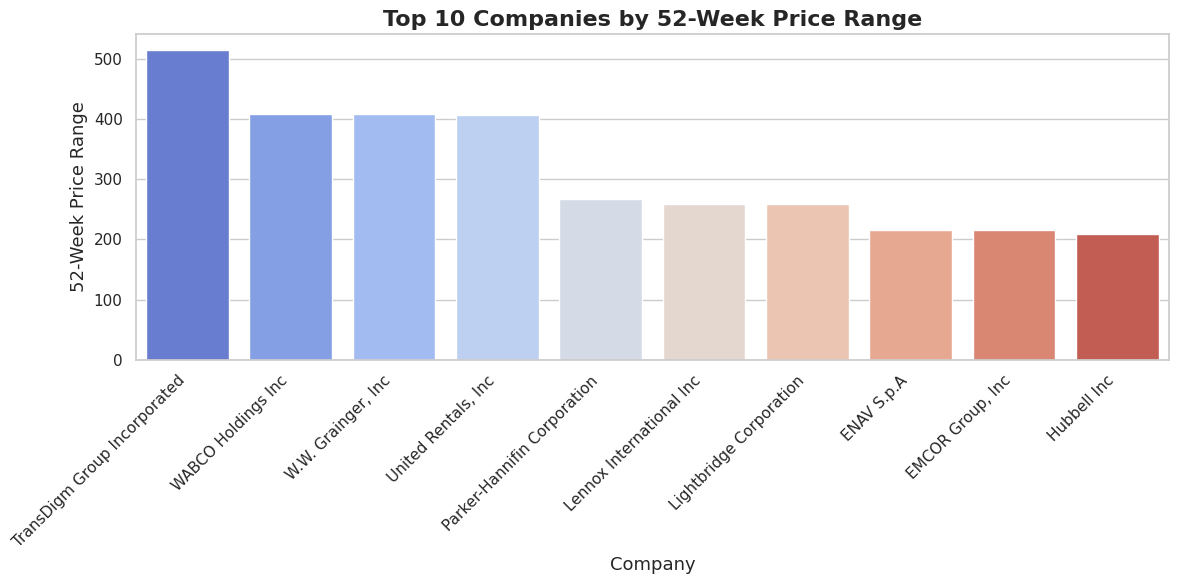

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create a 'price_range' as a proxy for stock performance
df['price_range'] = df['52w_highest_price'] - df['52w_lowest_price']

# Sort and get top 10 companies by price range
top_companies = df.sort_values('price_range', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='company_name', y='price_range', palette='coolwarm')

plt.title('Top 10 Companies by 52-Week Price Range', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=13)
plt.ylabel('52-Week Price Range', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
print(df[['company_esg_pulse', '52w_change_price_percent', 'volume']].isnull().sum())


company_esg_pulse           0
52w_change_price_percent    0
volume                      0
dtype: int64


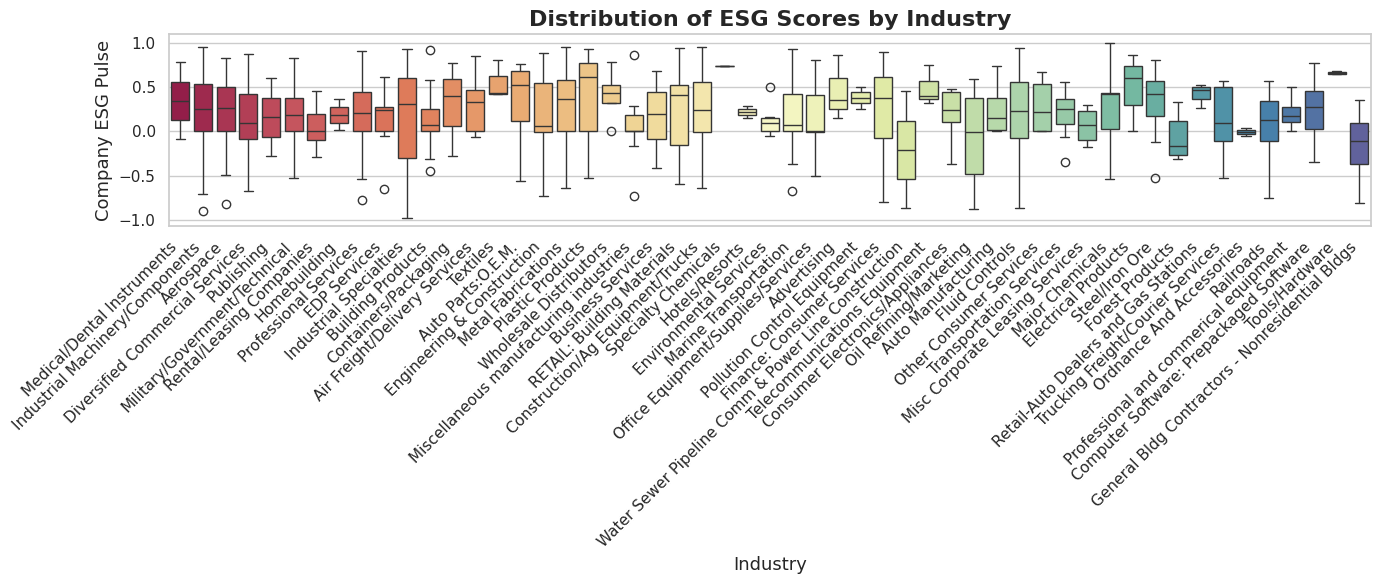

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='industry', y='company_esg_pulse', palette='Spectral')

plt.title('Distribution of ESG Scores by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=13)
plt.ylabel('Company ESG Pulse', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


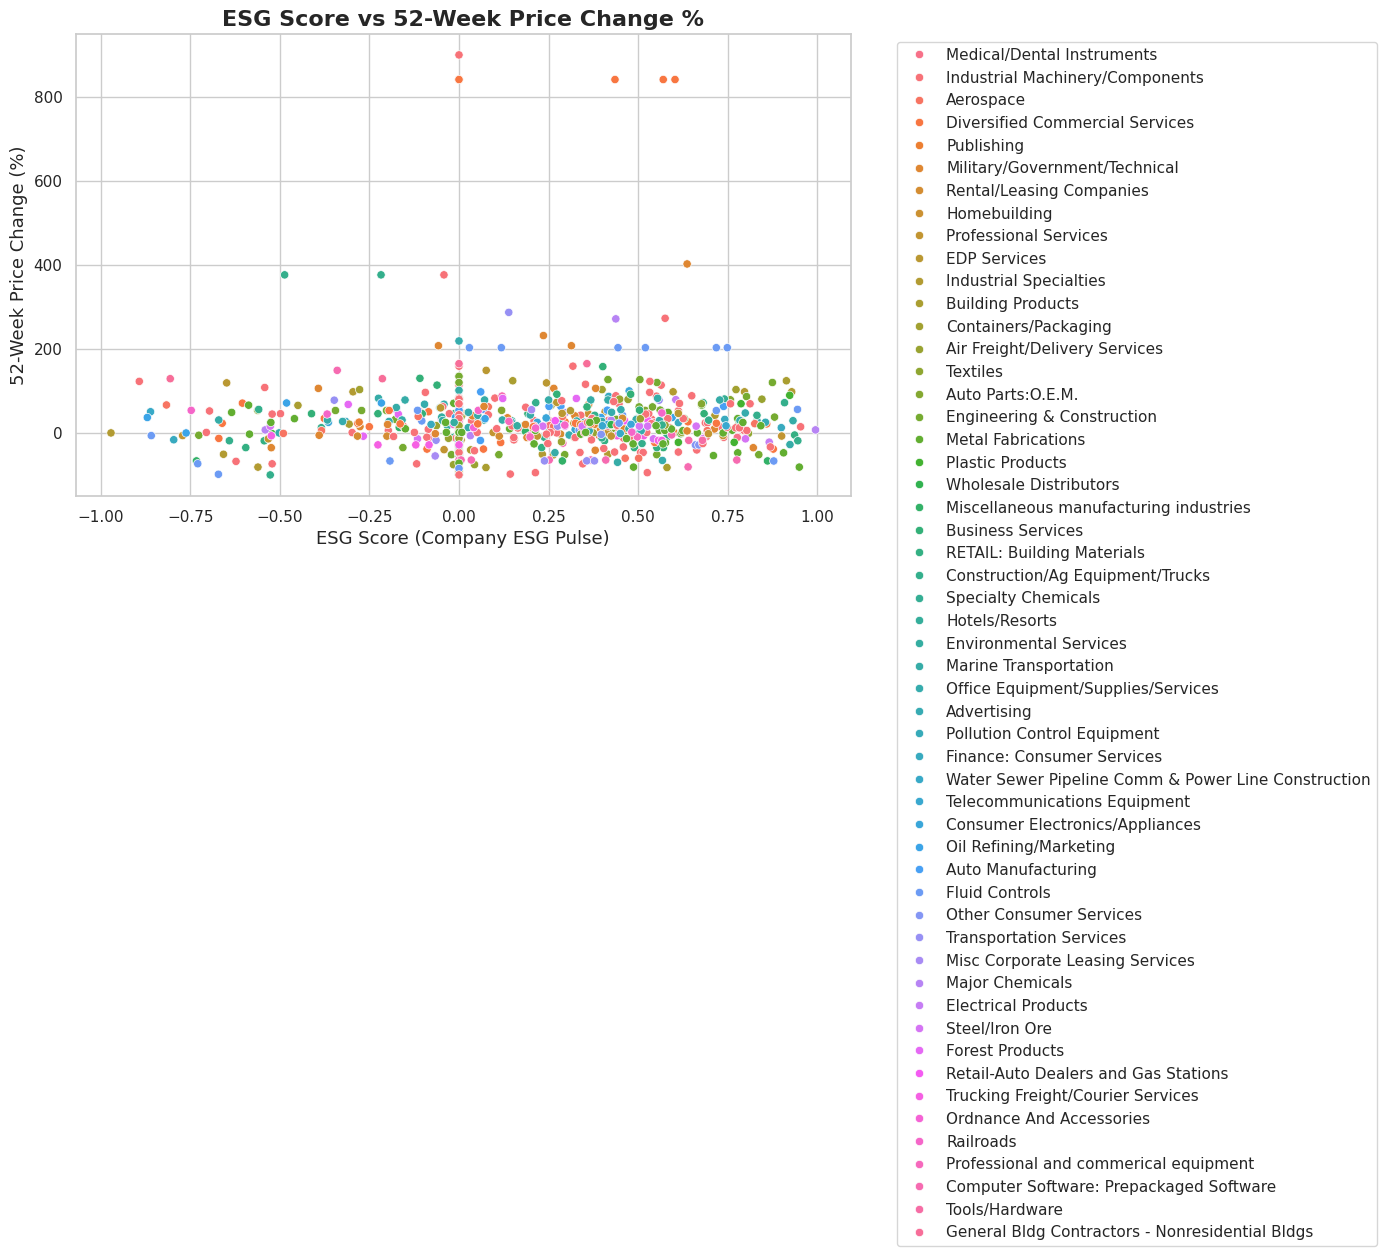

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='company_esg_pulse', y='52w_change_price_percent', hue='industry', palette='husl')

plt.title('ESG Score vs 52-Week Price Change %', fontsize=16, fontweight='bold')
plt.xlabel('ESG Score (Company ESG Pulse)', fontsize=13)
plt.ylabel('52-Week Price Change (%)', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Load the data
data = pd.read_csv('Data.csv')

In [ ]:
# Clean column names: remove leading/trailing whitespace
data.columns = data.columns.str.strip()


In [ ]:
# Check the cleaned column names (optional)
print("Columns:", data.columns.tolist())


Columns: ['Unique_id', 'Symbol', 'Company_name', 'Exchange', 'gicSector', 'gicSubindustry', 'Company_ESG_pulse', 'ESG_beta', 'SNP', 'Sustainalytics', 'MSCI', 'SNP_normalized', 'Sustainalytics_normalized', 'MSCI_normalized', 'Update_date-ESG_scores', 'Address', 'Country', 'Volume', 'Market Cap', '52w_highest price', '52w_lowest price', '52w_change price', '52w_change price percent', '52w_average volume', 'Name', 'Sector', 'Industry', 'isin', 'cusip', 'Securities_type', 'Currency_code']


In [ ]:
# Select required columns and drop missing values
cols_needed = ['Company_name', 'Market Cap', 'Company_ESG_pulse']
data = data[cols_needed].dropna()

In [ ]:
# Convert 'Market Cap' to numeric (remove commas if needed)
data['Market Cap'] = pd.to_numeric(data['Market Cap'].astype(str).str.replace(',', ''), errors='coerce')

In [ ]:
# Remove rows where conversion failed
data = data.dropna(subset=['Market Cap'])


In [ ]:
first_10 = data.head(10)


In [ ]:
# --- Top 10 companies by Market Cap ---
top_10 = data.sort_values(by='Market Cap', ascending=False).head(10)


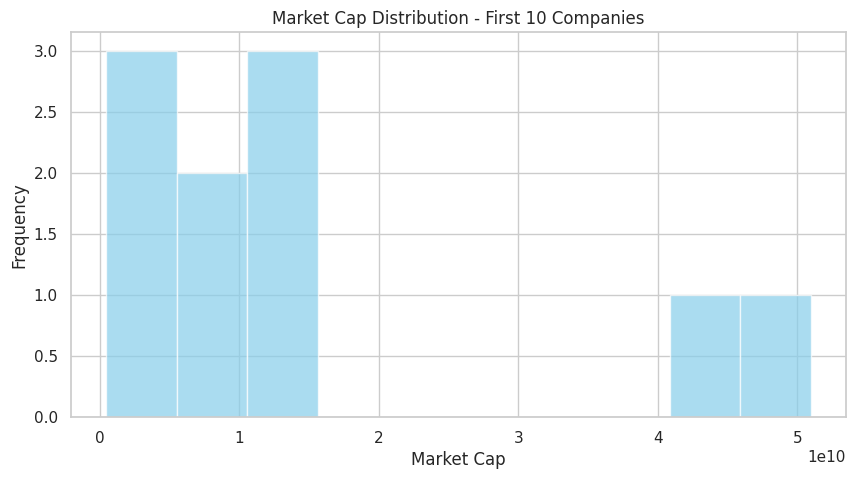

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(first_10['Market Cap'], bins=10, color='skyblue', alpha=0.7)
plt.title('Market Cap Distribution - First 10 Companies')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.show()

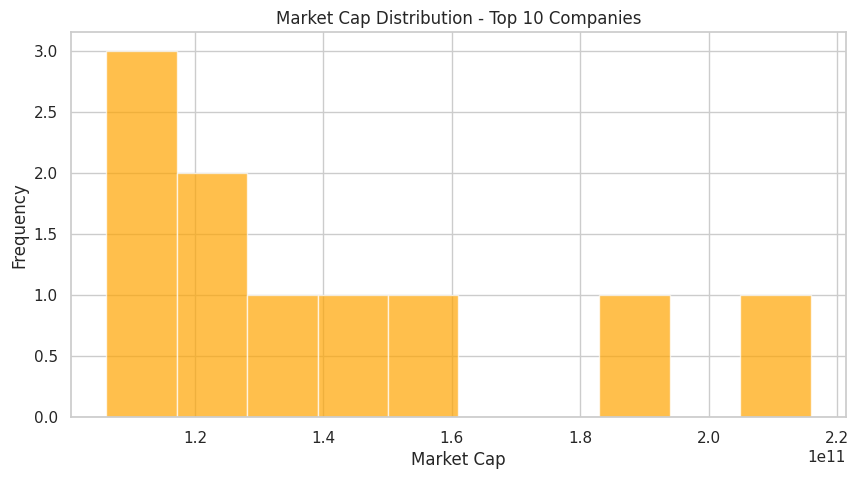

In [ ]:
# --- Histogram: Market Cap of Top 10 Companies ---
plt.figure(figsize=(10, 5))
plt.hist(top_10['Market Cap'], bins=10, color='orange', alpha=0.7)
plt.title('Market Cap Distribution - Top 10 Companies')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.show()

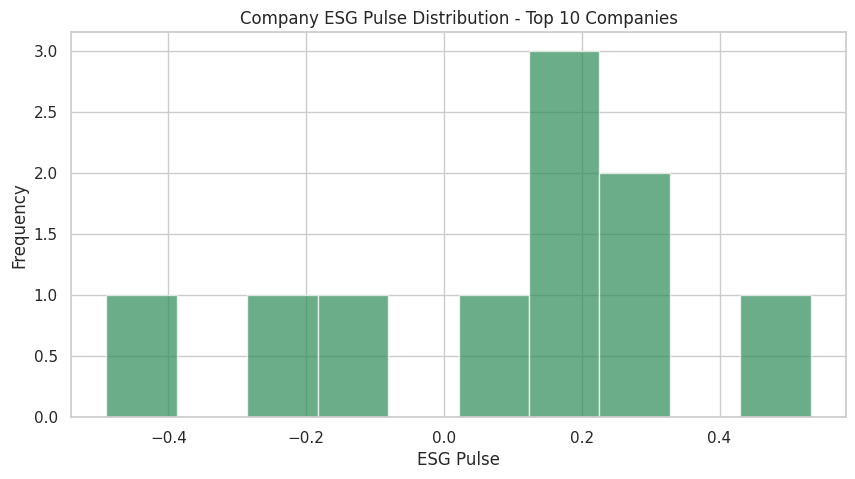

In [ ]:
# --- Histogram: ESG Pulse of Top 10 Companies ---
plt.figure(figsize=(10, 5))
plt.hist(top_10['Company_ESG_pulse'], bins=10, color='seagreen', alpha=0.7)
plt.title('Company ESG Pulse Distribution - Top 10 Companies')
plt.xlabel('ESG Pulse')
plt.ylabel('Frequency')
plt.show()

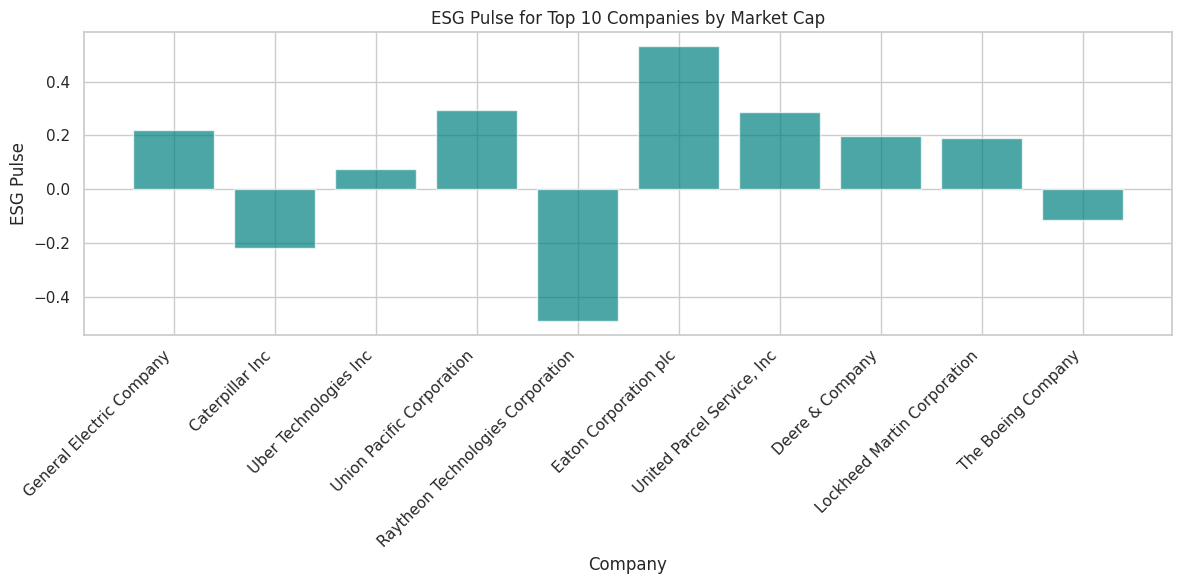

In [ ]:
# Bar chart of ESG Pulse per company (top 10 by Market Cap)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10['Company_name'], top_10['Company_ESG_pulse'], color='teal', alpha=0.7)
plt.title('ESG Pulse for Top 10 Companies by Market Cap')
plt.xlabel('Company')
plt.ylabel('ESG Pulse')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Convert column names for consistency
data.columns = data.columns.str.strip()



In [ ]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])



In [ ]:
# Drop rows with missing ESG Pulse
corr_data = numeric_cols.dropna(subset=['Company_ESG_pulse'])



In [ ]:
# Compute correlations
correlations = corr_data.corr()['Company_ESG_pulse'].sort_values(ascending=False)
print("Correlation with ESG Pulse:\n", correlations)


Correlation with ESG Pulse:
 Company_ESG_pulse    1.00000
Market Cap          -0.09407
Name: Company_ESG_pulse, dtype: float64


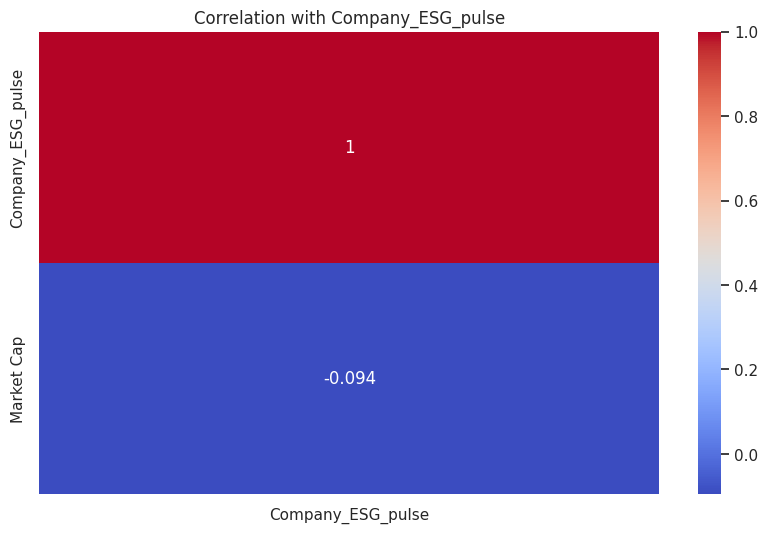

In [ ]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data.corr()[['Company_ESG_pulse']].sort_values(by='Company_ESG_pulse', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Company_ESG_pulse')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in numeric features
model_data = corr_data.dropna()

In [ ]:
# Set X and y
X = model_data.drop(columns=['Company_ESG_pulse'])
y = model_data['Company_ESG_pulse']


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Fit Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_scaled, y)


RandomForestRegressor(random_state=42)

In [ ]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importances)


Feature Importances:
 Market Cap    1.0
dtype: float64


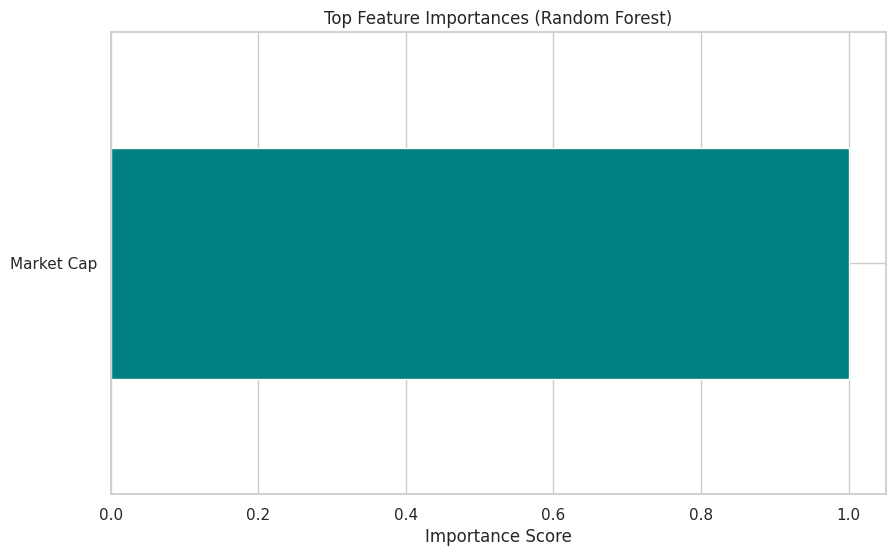

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh', color='teal')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



In [ ]:
# Select useful features and drop rows with missing values
features = ['SNP_normalized', 'Sustainalytics_normalized', 'MSCI_normalized']
df = df[features + ['Company_name']].dropna()

In [ ]:
# Create a binary label: 1 if average ESG score > 0.5, else 0
df['avg_score'] = df[features].mean(axis=1)
df['label'] = (df['avg_score'] > 0.5).astype(int)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Feature matrix and labels
X = df[features]
y = df['label']

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [ ]:
# View company predictions
df['prediction'] = clf.predict(X_scaled)
print(df[['Company_name', 'avg_score', 'label', 'prediction']].head(20))

                                    Company_name  avg_score  label  prediction
0                                     3M Company  82.486667      1           1
1                                     51job, Inc  70.893333      1           1
5                                  AB SKF (publ)  40.290000      1           1
6                                AB Volvo (publ)  56.123333      1           1
7                                        ABB Ltd  71.466667      1           1
12                                       AGC Inc  50.383333      1           1
14                                        AMERCO  76.226667      1           1
15                                   AMETEK, Inc  39.520000      1           1
17                              ANA Holdings Inc  80.560000      1           1
31                              Aena S.M.E., S.A  40.113333      1           1
32                           AerCap Holdings N.V  61.810000      1           1
42                                     Airbus SE  57

In [ ]:
# Select ESG-related columns and drop rows with missing values
features = ['SNP_normalized', 'Sustainalytics_normalized', 'MSCI_normalized']
df_filtered = df[['Company_name'] + features].dropna()


In [ ]:
# Calculate the average ESG score for each company
df_filtered['avg_ESG_score'] = df_filtered[features].mean(axis=1)

In [ ]:
# Sort companies by ESG score (highest first) and select top 10
top_10 = df_filtered.sort_values(by='avg_ESG_score', ascending=False).head(10)

In [ ]:
# Print the result
print("Top 10 Companies by ESG Score:")
print(top_10[['Company_name', 'avg_ESG_score']])

Top 10 Companies by ESG Score:
                         Company_name  avg_ESG_score
694                         Xylem Inc     183.486667
0                          3M Company      82.486667
17                   ANA Holdings Inc      80.560000
147                   Caterpillar Inc      79.383333
569        Siemens Aktiengesellschaft      77.393333
14                             AMERCO      76.226667
558  Sensata Technologies Holding plc      75.820000
472      Northrop Grumman Corporation      75.310000
117                 Bureau Veritas SA      75.143333
581      Spirax-Sarco Engineering plc      74.820000


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Data.csv to Data (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('Data.csv')  # Make sure the filename matches the uploaded file
print(df.columns)


Index(['Unique_id', 'Symbol', 'Company_name', 'Exchange', 'gicSector',
       'gicSubindustry', 'Company_ESG_pulse', 'ESG_beta', 'SNP',
       'Sustainalytics', 'MSCI', 'SNP_normalized', 'Sustainalytics_normalized',
       'MSCI_normalized', 'Update_date-ESG_scores', 'Address', 'Country',
       'Volume', 'Market Cap', '52w_highest price', '52w_lowest price',
       '52w_change price', '52w_change price percent', '52w_average volume',
       'Name', 'Sector', 'Industry', 'isin', 'cusip', 'Securities_type',
       'Currency_code'],
      dtype='object')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Drop rows with missing values in selected columns
df_clean = df[['Company_ESG_pulse', 'MSCI_normalized']].dropna()

# Define actual and predicted values
y_true = df_clean['Company_ESG_pulse']
y_pred = df_clean['MSCI_normalized']

In [ ]:
# Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [ ]:
# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 67.8403
Mean Squared Error (MSE): 4952.6859
Root Mean Squared Error (RMSE): 70.3753
R-squared (R²): -55066.8364


In [ ]:
print(df['MSCI_normalized'].dtype)
print(df['MSCI_normalized'].head())


float64
0    99.96
1    85.68
2      NaN
3      NaN
4      NaN
Name: MSCI_normalized, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Drop rows with missing values in selected columns
df_clean = df[['ESG_beta', 'Market Cap']].dropna()

# Define actual and predicted values
y_true = df_clean['ESG_beta']
y_pred = df_clean['Market Cap']

In [ ]:
# Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [ ]:
# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 46251406291.6183
Mean Squared Error (MSE): 4016870596917998911488.0000
Root Mean Squared Error (RMSE): 63378786647.5684
R-squared (R²): -94400367301724949446656.0000


**result presentation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
# Load your CSV
df = pd.read_csv("Data.csv")  # Replace with your file name



In [ ]:
# Use only relevant numeric ESG columns
columns = ['Sustainalytics_normalized', 'MSCI_normalized', 'SNP_normalized']
df_esg = df[columns].apply(pd.to_numeric, errors='coerce').dropna()


In [ ]:
# Define target and predictions
y_true = df_esg['Sustainalytics_normalized']
y_pred_m = df_esg['MSCI_normalized']
y_pred_s = df_esg['SNP_normalized']

In [ ]:
# Function to print metrics
def print_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 {label} vs Sustainalytics_normalized")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}")
    return pd.Series([mae, mse, rmse, r2], index=['MAE', 'MSE', 'RMSE', 'R2'])

In [ ]:
# Evaluate both MSCI and SNP
metrics_m = print_metrics(y_true, y_pred_m, "MSCI_normalized")
metrics_s = print_metrics(y_true, y_pred_s, "SNP_normalized")




🔹 MSCI_normalized vs Sustainalytics_normalized
  MAE:  26.8967
  MSE:  1746.6672
  RMSE: 41.7931
  R²:   -0.2903

🔹 SNP_normalized vs Sustainalytics_normalized
  MAE:  35.1378
  MSE:  2665.4341
  RMSE: 51.6278
  R²:   -0.9690


In [ ]:
# Combine metrics into table
metrics_df = pd.DataFrame({'MSCI': metrics_m, 'SNP': metrics_s})
print("\n Performance Comparison Table:\n")
print(metrics_df)


 Performance Comparison Table:

             MSCI          SNP
MAE     26.896693    35.137795
MSE   1746.667208  2665.434055
RMSE    41.793148    51.627842
R2      -0.290280    -0.968981


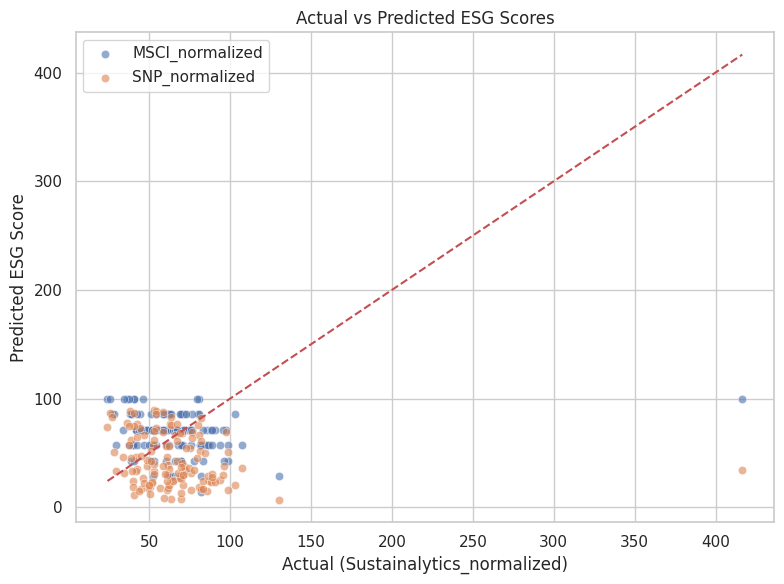

In [ ]:
# Plot Actual vs Predicted for MSCI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred_m, label='MSCI_normalized', alpha=0.6)
sns.scatterplot(x=y_true, y=y_pred_s, label='SNP_normalized', alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Actual (Sustainalytics_normalized)')
plt.ylabel('Predicted ESG Score')
plt.title('Actual vs Predicted ESG Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

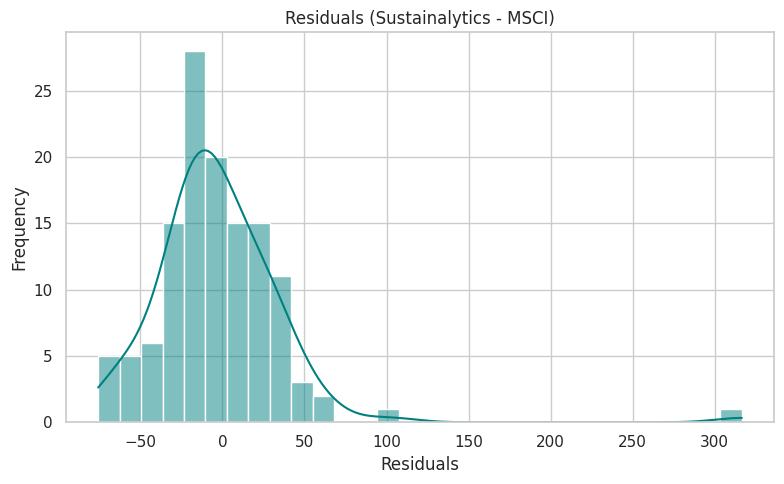

In [ ]:
# Residual distribution for MSCI
plt.figure(figsize=(8, 5))
residuals = y_true - y_pred_m
sns.histplot(residuals, kde=True, bins=30, color='teal')
plt.title('Residuals (Sustainalytics - MSCI)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# Load and prepare data
df = pd.read_csv("Data.csv")
features = ['MSCI_normalized', 'SNP_normalized', 'Company_ESG_pulse', 'ESG_beta']
target = 'Sustainalytics_normalized'
df = df[features + [target]].apply(pd.to_numeric, errors='coerce').dropna()
X, y = df[features], df[target]

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train model and measure time
model = LinearRegression()
start = time.time(); model.fit(X_train, y_train); fit_time = time.time() - start
start = time.time(); y_pred = model.predict(X_test); pred_time = time.time() - start

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 2: Load data
df = pd.read_csv('/content/Data.csv')  # Adjust path if needed

In [ ]:
# Step 3: Data Preprocessing
# Use only numerical columns, drop rows with missing values
df_numeric = df.select_dtypes(include=[np.number])
df_clean = df_numeric.dropna()

In [ ]:
# Define features and target
target = 'Company_ESG_pulse'
if target not in df_clean.columns:
    raise ValueError("Target variable 'Company_ESG_pulse' not found in the dataset.")
X = df_clean.drop(columns=[target])
y = df_clean[target]

In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train the Model (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

# Performance Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display Results
print("Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
RMSE: 0.2709
MAE: 0.2233
R² Score: -0.2646


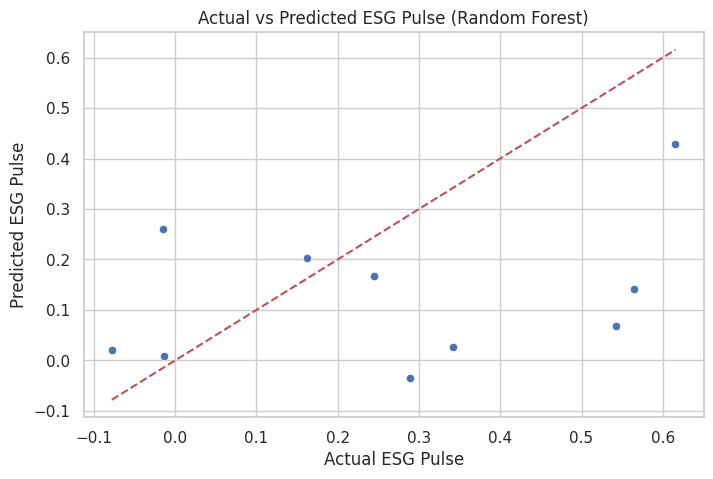

In [ ]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual ESG Pulse")
plt.ylabel("Predicted ESG Pulse")
plt.title("Actual vs Predicted ESG Pulse (Random Forest)")
plt.grid(True)
plt.show()